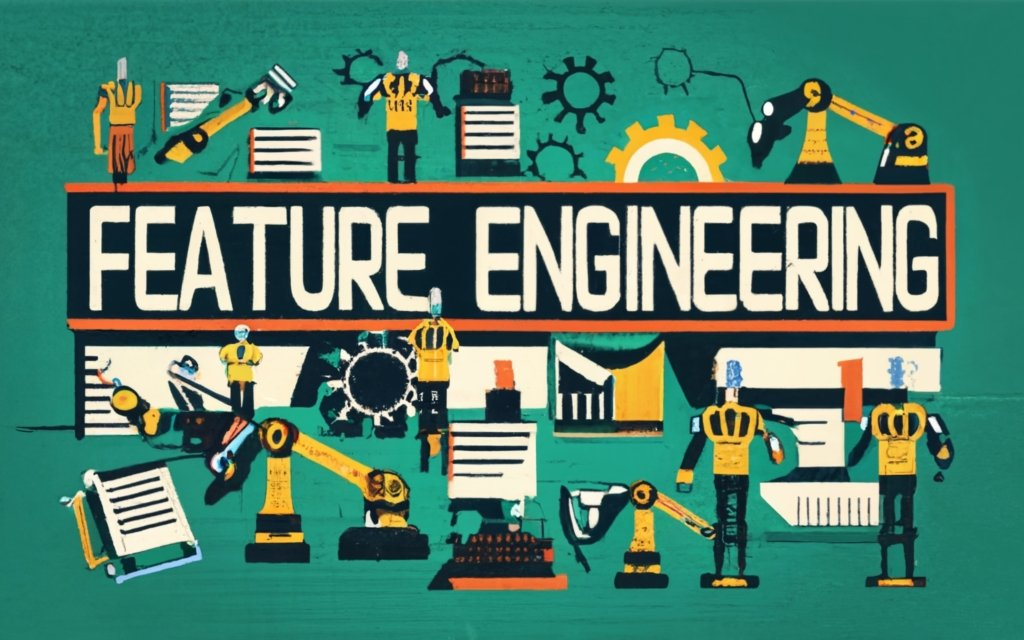

# Exploring Feature Engineering

We know that the real world data is not gonna be all pretty, it will most be not clean and have many issues such as missing values for some features, and having features of different scales. And when it comes to feeding data to an algorithm, it's very picky and so we might have to bring out new features from our data, reduce some features, expand some features, apply transformations to some features. And Finally make a pipeline of our flow, such that we don't have to repeat one by one for our test data. Let's discuss these in detail. Here's what lies ahead.

### Table Of Contents

1.Handling Missing values

   - 1.1 Problems of Having Missing values
   - 1.2 Understanding Types of Missing Values
   - 1.3 Dealing MV Using SimpleImputer Method
   - 1.4 Dealing MV Using KNN Imputer Method

2.Handling Categorical Values

   - 2.1 One Hot Encoding
   - 2.2 Label Encoding
   - 2.3 Ordinal Encoding
   - 2.4 Multi Label Binarizer
   - 2.5 Count/Frequency Encoding
   - 2.6 Target Guided Ordinal Encoding

3.Feature Scaling

   - 3.1 Standardization/Standard Scaler
   - 3.2 Normalization/MinMax Scaler
   - 3.3 Max Abs Scaler
   - 3.4 Robust Scaler

4.Feature Selection 
  - 4.1 why Feature Selection Matters
  
  
  - 4.2 Types of Feature Selection
  
  
  - 4.3 Filter Methods
    - Variance Threshold
    - SelectKBest
    - SelectPercentile
    - GenericUnivariateSelect
    
    
  - 4.4 Wrapper Methods
    - RFE
    - RFECV
    - SelectFromModel
    - SequentialFeatureSelector
    

5.Feature Transformation

    - Undestanding QQPlot and PP-Plot
    - logarithmic transformation
    - reciprocal transformation
    - square root transformation
    - exponential transformation 
    - boxcox transformation


6.Using Column Transformer to speed up FE


7.Using Pipelines to automate the FE
  - What are Pipelines
  - Accessing individual steps in pipeline
  - Accessing Parameters in Pipeline
  - Performing Grid Search with Pipeline
  - Combining Transformers and Pipeline
  - Visualizing the Pipeline

## 1. Handling Missing Values

There can be various reasons for missing values such as Survey non responses, data entry errors, incompatible formats, privacy concerns, etc. And they could cause serveral problems during data analsis and modelling.
### 1.1 Problems of Having Missing Values

- **Bias in Analysis:** When data is missing not at random, it can introduce bias in your analysis. For example, if only high-income individuals tend to skip income disclosure in a survey, this can lead to an underestimation of the average income.


- **Reduced Sample Size:** Missing data can reduce the effective sample size, potentially leading to a loss of statistical power and less robust models.


- **Inaccurate Models:** Many machine learning algorithms cannot handle missing values. Attempting to train models on datasets with missing values may lead to errors or inaccurate predictions.

### 1.2 Types of Missing Data

Understanding the type of missing data is crucial for choosing the appropriate handling technique:

- **Missing Completely at Random (MCAR):** In this scenario, the missing values are randomly distributed and unrelated to any other variables. Handling MCAR is relatively straightforward, as it doesn't introduce bias.


- **Missing Not at Random (MNAR):** The missing values depend on the missing values themselves, making this the most complex type to handle. Dealing with MNAR often requires domain knowledge and modeling.


- **Missing at Random (MAR):** Missing values are related to other observed variables but not the missing values themselves. Handling MAR often involves statistical techniques to impute missing data.

1. Simple Imputer: Mean/ Median/Mode replacement
2. Random Sample Imputation
3. End of Distribution imputation
4. Arbitrary imputation
5. Frequent categories imputation

### 1.3 Dealing MV using Simple Imputer Method

Luckily, Scikit Learn Provides `sklearn.impute` API functionality to fill missing values in a dataset.

Now the question arises, **When should we apply this?** This is used when we want to fill missing values with mean, median, mode, or a constant. Mean/median imputation has the assumption that the data are missing completely at random(MCAR). 

And remember, Mean is sensitive to outliers, so when you have outliers in your data, use median.

You can also use pandas fillna to do this, but one beautiful thing here is that you can specify the `missing_values` parameter to indicate what is considered as missing in your dataset. This is important when dealing with datasets that represent missing values in various ways (e.g., NaN, -1, or other placeholders).

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [3]:
## Lets see the percentage of missing values
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

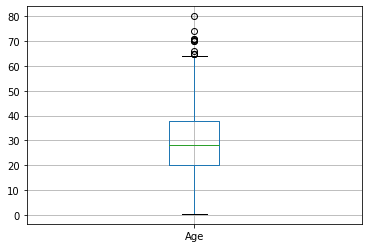

In [4]:
df.boxplot(column=['Age'])

We can see few outliers, so we can go with median.

In [5]:
median=df.Age.median()
median

28.0

In [6]:
from sklearn.impute import SimpleImputer
si = SimpleImputer(strategy='median')
df['Age_median']=si.fit_transform(np.array(df['Age']).reshape(-1, 1))

so simply create `SimpleImputer(strategy)` imputer object and use `.fit_transform(df[columns to impute])` method to fill your data with the expected strategy, then you can either create a new column with it or you can just assign it to the existing column.

**Strategy methods**
- Use `mean`, to replace missing values using the mean along each column. Can only be used with numeric data.

- Use `median`, to replace missing values using the median along each column. Can only be used with numeric data.

- Use `most_frequent`, to replace missing using the most frequent value along each column. Can be used with strings or numeric data. If there is more than one such value, only the smallest is returned.

- Use `constant`, to replace missing values with fill_value. Can be used with strings or numeric data.

In [7]:
print(df['Age'].std())
print(df['Age_median'].std())

14.526497332334044
13.019696550973194


we can observe that imputing by median doesn't affect it much and maintains the standard deviation close to the data with null values.

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

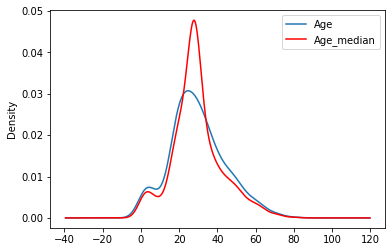

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)
df.Age.plot(kind='kde', ax=ax)
df.Age_median.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

### Advantages And Disadvantages of Mean/Median Imputation

#### Advantages
1. Easy to implement(Robust to outliers)
2. Faster way to obtain the complete dataset

#### Disadvantages
1. Change or Distortion in the original variance
2. Impacts Correlation

###      1.4 KNN Imputer

- KNN imputer is based on the idea of using the values of the nearest neighbors to impute missing data points in a dataset. So, For each missing point it calculates the distances with the rest of the points and it takes k close neighbors and the average of them will be replaced by missing value.


- K represents the number of nearest neighbors to consider. Choosing the right value for K is crucial. If you have domain knowledge or can cross-validate to find an optimal K value, KNN imputation can be very effective.


- The `metric` parameter defines the distance measure used to determine the similarity between data points. Common choices include 'euclidean', 'manhattan', or other distance metrics. The choice of metric can impact the results


- KNN imputation is particularly effective when there is a meaningful relationship between the missing values and other observed features. If the pattern of missingness is not entirely random and you believe that similar data points tend to have similar values for the missing feature, KNN can be a good choice.

In [10]:
from sklearn.impute import KNNImputer

# Initialize the KNNImputer with the number of neighbors (k)
imputer = KNNImputer(n_neighbors=5)

In [11]:
df = pd.read_csv('titanic.csv')
# Apply KNN imputation to the 'Age' column
df['Age'] = imputer.fit_transform(df[['Age']])

## 2. Handle Categorical Features

### 2.1 One Hot Encoding

In one-hot encoding, each unique category or label within a categorical feature is transformed into a binary (0 or 1) feature column. For each category, a new binary column is created, and it's marked with a 1 if the original feature belongs to that category and 0 if it doesn't. Here's how to use scikit-learn's OneHotEncoder API for one-hot encoding:



In [12]:
from sklearn.preprocessing import OneHotEncoder

In [13]:
df=pd.read_csv('titanic.csv',usecols=['Sex'])

In [14]:
df.head()

,Sex
0,male
1,female
2,female
3,female
4,male


In [15]:
# Create a OneHotEncoder instance
encoder = OneHotEncoder()

# Fit the encoder to the 'Sex' column and transform it
encoded_sex = encoder.fit_transform(df[['Sex']])

# Create a DataFrame from the encoded data
encoded_sex_df = pd.DataFrame(encoded_sex.toarray())

# Concatenate the encoded 'Sex' DataFrame with the original dataset
df = pd.concat([df, encoded_sex_df], axis=1)

In [16]:
df.head()

,Sex,0,1
0,male,0.0,1.0
1,female,1.0,0.0
2,female,1.0,0.0
3,female,1.0,0.0
4,male,0.0,1.0


### 2.2 Label Encoding

Label Encoding is another technique for converting categorical data into a numerical format. Unlike one-hot encoding, where each category becomes its own binary feature column, label encoding assigns a unique integer to each category. And it gives the labels based on sort order.

In [17]:
from sklearn.preprocessing import LabelEncoder

# Load the Titanic dataset (replace 'titanic.csv' with the actual path to your dataset)
df = pd.read_csv('titanic.csv')

# Create a LabelEncoder instance
encoder = LabelEncoder()

# Fit and transform the selected column using the encoder
df['sex_encoded'] = encoder.fit_transform(df['Sex'])

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,sex_encoded
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [18]:
df[df.Embarked=='Q']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,sex_encoded
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,1
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,NaN,Q,1
22,23,1,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,NaN,Q,0
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,0
32,33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
790,791,0,3,"Keane, Mr. Andrew ""Andy""",male,NaN,0,0,12460,7.7500,NaN,Q,1
825,826,0,3,"Flynn, Mr. John",male,NaN,0,0,368323,6.9500,NaN,Q,1
828,829,1,3,"McCormack, Mr. Thomas Joseph",male,NaN,0,0,367228,7.7500,NaN,Q,1
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q,0


### 2.3 Ordinal Encoding

Ordinal Encoding is a technique for encoding categorical data where the categories have a meaningful order or ranking. Unlike Label encoding, Here you can specify the specific order for your column values.

In [19]:
from sklearn.preprocessing import OrdinalEncoder

# Sample data
data = pd.DataFrame({'Size': ['Small', 'Medium', 'Large', 'Medium', 'Small']})

# Define the custom order of labels
custom_order = ['Small', 'Medium', 'Large']

# Initialize the OrdinalEncoder with the custom order
encoder = OrdinalEncoder(categories=[custom_order])

# Fit and transform the data
encoded_data = encoder.fit_transform(data[['Size']])

# Add the encoded values to the DataFrame
data['Encoded_Size'] = encoded_data

# Display the DataFrame with ordinal encoding
print(data)


     Size  Encoded_Size
0   Small           0.0
1  Medium           1.0
2   Large           2.0
3  Medium           1.0
4   Small           0.0


## 2.4 MultiLabel Binarizer

The MultiLabelBinarizer in scikit-learn is a preprocessing tool used to convert a list of multilabels (in the form of lists or sets) into a binary matrix where each label is treated as a separate binary feature. This is often used in multi-label classification tasks, where a data point can belong to multiple categories simultaneously.

In [20]:
from sklearn.preprocessing import MultiLabelBinarizer

# Sample data
labels = [('A', 'B'), ('B', 'C'), ('A', 'C'), ('D', 'E')]

# Initialize the MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# Fit and transform the data using the binarizer
binary_data = mlb.fit_transform(labels)

# Convert the binary data to a DataFrame for better visualization
binary_df = pd.DataFrame(binary_data, columns=mlb.classes_)

# Display the DataFrame with the binary matrix
print(binary_df)


   A  B  C  D  E
0  1  1  0  0  0
1  0  1  1  0  0
2  1  0  1  0  0
3  0  0  0  1  1


### 2.5 Count/Frequency Encoding

Count Encoding, also known as Frequency Encoding, is a method for encoding categorical variables by replacing each category with the count or frequency of that category in the dataset. 

In [21]:
import pandas as pd

# Sample data
data = pd.DataFrame({'Color': ['Red', 'Blue', 'Red', 'Green', 'Blue', 'Red']})

# Perform count encoding
count_encoding = data['Color'].value_counts().to_dict()

# Map the counts to the original data
data['Color_Count'] = data['Color'].map(count_encoding)

# Display the DataFrame with count encoding
print(data)


   Color  Color_Count
0    Red            3
1   Blue            2
2    Red            3
3  Green            1
4   Blue            2
5    Red            3


### 2.6 Target Guided Ordinal Encoding
Ordering the labels according to the target, Replace the labels by the joint probability of being 1 or 0

In [22]:
import pandas as pd

# Sample data
data = pd.DataFrame({
    'City': ['A', 'B', 'A', 'C', 'B', 'C', 'A'],
    'Target': [0, 1, 1, 0, 1, 0, 1]
})

# Calculate the mean target value for each category
mean_target = data.groupby('City')['Target'].mean().sort_values()

# Create a mapping based on the sorted means
mapping = {city: rank for rank, city in enumerate(mean_target.index)}

# Map the categories to their corresponding rank
data['City_Rank'] = data['City'].map(mapping)

# Display the DataFrame with target-guided ordinal encoding
print(data)


  City  Target  City_Rank
0    A       0          1
1    B       1          2
2    A       1          1
3    C       0          0
4    B       1          2
5    C       0          0
6    A       1          1


In this code:

1. We have a sample DataFrame data with two columns: 'City' as the categorical feature and 'Target' as the target variable (binary in this case).


2. We calculate the mean target value for each category in the 'City' column using groupby and mean.


3. We sort the categories based on their mean target values.


4. We create a mapping between the original categories and their corresponding rank based on the sorted order of mean target values.


5. We use the map function to replace the original 'City' column with the ordinal values obtained from the target-guided encoding, creating a new column 'City_Rank.'

## 3. Feature Scaling

Imagine you are making a cake, and you have two main ingredients: flour and sugar. Flour is measured in grams, while sugar is measured in milligrams. If you mix these ingredients as they are, your cake will either be too sugary or too floury because their scales are vastly different, you can't even taste that, right. To make a perfect cake, you scale both ingredients to the same unit, like grams. Well, Feature Scaling does something similar for data in machine learning.

Similarly, Feature scaling is a data preprocessing technique used to transform the values of features or variables in a dataset to a similar scale. The purpose is to ensure that all features contribute equally to the model and to avoid the domination of features with larger values.

### When to use Feature Scaling
- However, Not all algorithms require the feature scaling. Some machine learning algorithms are sensitive to feature scaling, while others are insensitive.

- Machine Learning Algorithms that use gradient descent as an optimization technique require data to be scaled.

### Types of Feature Scaling
1. Standardization/StandardScaler
2. Normalization/MinMaxScaler  
3. MaxAbsScaler

### 3.1 Standardization
We try to bring all the variables or features to a similar scale. standarisation means centering the variable at zero. Main 0 mean, and variance 1. z=(x-x_mean)/std

In [23]:
from sklearn.preprocessing import StandardScaler

# Load the Titanic dataset (replace 'titanic.csv' with the actual path to your dataset)
titanic_data = pd.read_csv('titanic.csv')

# Select the feature columns you want to standardize (e.g., 'Age' and 'Fare')
feature_columns = ['Age', 'Fare']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the selected feature columns using the scaler
titanic_data[feature_columns] = scaler.fit_transform(titanic_data[feature_columns])

# Display the DataFrame with standardized features
print(titanic_data[feature_columns].head())

        Age      Fare
0 -0.530377 -0.502445
1  0.571831  0.786845
2 -0.254825 -0.488854
3  0.365167  0.420730
4  0.365167 -0.486337


### 3.2 Normalization / Min Max Scaling
Min Max Scaling scales the values between 0 to 1.
X_scaled = (X - X.min / (X.max - X.min)

In [24]:
df=pd.read_csv('titanic.csv',usecols=['Pclass','Fare'])

In [25]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()
df_minmax=pd.DataFrame(min_max.fit_transform(df),columns=df.columns)
df_minmax.head()

,Pclass,Fare
0,1.0,0.014151
1,0.0,0.139136
2,1.0,0.015469
3,0.0,0.103644
4,1.0,0.015713


(array([216.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 184.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 491.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 20 Patch objects>)

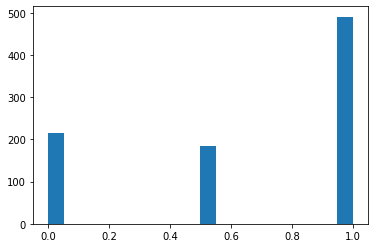

In [26]:
plt.hist(df_minmax['Pclass'],bins=20)

(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 20 Patch objects>)

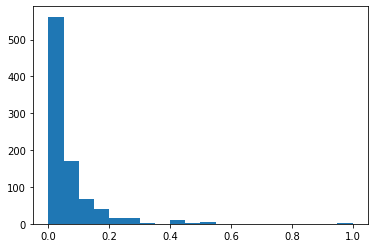

In [27]:
plt.hist(df_minmax['Fare'],bins=20)

### 3.3 Max Abs Scaler

The MaxAbsScaler is another data preprocessing technique, similar to the StandardScaler, but it scales each feature by dividing it by its maximum absolute value. This approach is useful when you want to preserve the sparsity of the data, making it suitable for data with outliers or sparse features.

In [28]:
from sklearn.preprocessing import MaxAbsScaler

# Load the Titanic dataset (replace 'titanic.csv' with the actual path to your dataset)
titanic_data = pd.read_csv('titanic.csv')

# Select the feature columns you want to scale (e.g., 'Age' and 'Fare')
feature_columns = ['Age', 'Fare']

# Initialize the MaxAbsScaler
scaler = MaxAbsScaler()

# Fit and transform the selected feature columns using the scaler
titanic_data[feature_columns] = scaler.fit_transform(titanic_data[feature_columns])

# Display the DataFrame with the scaled features
print(titanic_data[feature_columns].head())


      Age      Fare
0  0.2750  0.014151
1  0.4750  0.139136
2  0.3250  0.015469
3  0.4375  0.103644
4  0.4375  0.015713


### 3.4 Robust Scaler
It is used to scale the feature to median and quantiles
Scaling using median and quantiles consists of substracting the median to all the observations, and then dividing by the interquantile difference. The interquantile difference is the difference between the 75th and 25th quantile:

IQR = 75th quantile - 25th quantile

X_scaled = (X - X.median) / IQR

0,1,2,3,4,5,6,7,8,9,10

9-90 percentile---90% of all values in this group is less than 9
1-10 precentile---10% of all values in this group is less than 1
4-40%

In [29]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
df_robust_scaler=pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
df_robust_scaler.head()

,Pclass,Fare
0,0.0,-0.312011
1,-2.0,2.461242
2,0.0,-0.282777
3,-2.0,1.673732
4,0.0,-0.277363


(array([562., 170.,  67.,  39.,  15.,  16.,   2.,   0.,   9.,   2.,   6.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([-0.62600478,  0.48343237,  1.59286952,  2.70230667,  3.81174382,
         4.92118096,  6.03061811,  7.14005526,  8.24949241,  9.35892956,
        10.46836671, 11.57780386, 12.68724101, 13.79667816, 14.90611531,
        16.01555246, 17.12498961, 18.23442675, 19.3438639 , 20.45330105,
        21.5627382 ]),
 <a list of 20 Patch objects>)

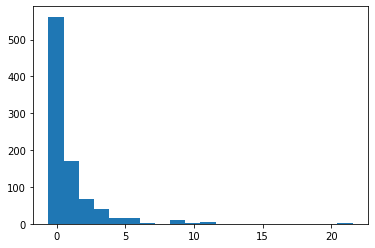

In [30]:
plt.hist(df_robust_scaler['Fare'],bins=20)

## 4. Feature Selection Techniques

### 4.1 Why Feature Selection Matters?

In the real data, not all features are of equal importance. Some might be irrelevant, redundant, or noisy. Feature selection helps in choosing the most relevant features, which can lead to faster training times, improved model performance, reduce  models, and better generalization.


However, it's essential to balance feature selection with the risk of losing potentially valuable information. Removing important features can lead to a loss of crucial insights and might result in a less accurate or less robust model. Therefore, it's crucial to carefully evaluate the trade-offs when performing feature selection in machine learning tasks.


Scikit Learn provides `sklearn.feature_selection` API to accomplish this task efficiently.
 



### 4.2 Types of Feature Selection

Feature selection can be approached in several ways:

**Filter Methods:** These methods rely on statistical measures to assign a score to each feature. Common techniques include correlation coefficient scores, chi-squared test, and mutual information. Features are selected based on predefined criteria, such as a certain threshold score.

**Wrapper Methods:** These methods involve the use of a specific machine learning algorithm to evaluate the performance of a model with different subsets of features. It's an iterative process where different combinations of features are used to train models, and the performance is evaluated to select the best feature subset.

**Embedded Methods:** These methods incorporate feature selection as part of the model training process. Some machine learning algorithms, like Lasso (L1 regularization) and tree-based algorithms, inherently perform feature selection by assigning zero weights to irrelevant features during model training.

### 4.3 Filter Methods

#### Variance Threshold

AS the name suggests, Variance Threshold is a simple technique that removes all features whose variance doesn't meet a certain threshold. This method operates on numerical features and is particularly useful for datasets where low-variance features are considered uninformative or noisy.

We can use `VarianceThreshold` method from `sklearn.feature_selection` module  to accomplish this task, and by default it removes a feature which has same value, that is zero variance.

In [31]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_breast_cancer

# Load the breast cancer dataset from scikit-learn
data = load_breast_cancer()
X, y = data.data, data.target

# Convert the data to a DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [32]:
from sklearn.feature_selection import VarianceThreshold

# Define the variance threshold value
threshold_value = 0.1

# Initialize the Variance Threshold object
selector = VarianceThreshold(threshold=threshold_value)

# Fit the selector to the data
X_filtered = selector.fit_transform(X)

# Print the shape of the original and filtered data
print("Original Data Shape:", X.shape)
print("Filtered Data Shape:", X_filtered.shape)

Original Data Shape: (569, 30)
Filtered Data Shape: (569, 11)


By applying the Variance Threshold method to the breast cancer dataset, you can observe how it filters out low-variance ( less than 0.1) features and brings down the features from 30 to 11, however we have to do further investigation as to observe if we lost any important features.

#### Univariate Feature Selection

Univariate feature selection is a type of feature selection method that selects the best features based on univariate statistical tests. It works by selecting the features that have the strongest relationship with the target variable. This approach assesses each feature individually and independently to determine its strength in relation to the target variable, without considering the interaction between features.

**Univariate feature selection is based on the following key steps:**

**Scoring Features:** It involves using statistical tests like chi-squared test, ANOVA F-test, or mutual information to score the features individually.

**Ranking Features:** Based on the scores obtained from the statistical tests, the features are ranked in order of their significance or importance.

**Selecting Features:** The top-k ranked features are then selected for further analysis or model building.

**Scikit-learn Implementation:** Scikit-learn provides several methods for univariate feature selection, including `SelectKBest`, `SelectPercentile`, and `GenericUnivariateSelect`. 

- Each API need a scoring function to score each feature, we can choose from 3 classes of scoring functions such as `Mutual Information(MI)`,`chi-square`, and `F-statistics`.


- MI And F-statistics can be used in both classification and regression problems, by using the methods `mutual_info_regression`,`mutual_info_classif`, `f_regression`, and `f_classif`.


- Chi-square can be used only in classification problems, by using `chi2`


- sklearn provides one more class of univariate feature selection methods that work on common univariate statistical tests for each feature such as `SelectFpr`,`SelectFdr`, and `SelectFwe`


- SelectFpr selects features based on a false positive rate test.


- SelectFdr selects features based on an estimated false discovery rate.


- SelectFwe selects features based on family-wise error rate

### SelectKBest

SelectKBest is a univariate feature selection method that selects the top K features based on their scores. It allows you to choose a specific number of features that exhibit the strongest relationship with the target variable.

In [33]:
from sklearn.datasets import load_breast_cancer

# Load the breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

In [34]:
X.shape

(569, 30)

30 features.

In [35]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [36]:
from sklearn.feature_selection import SelectKBest, chi2

# Initialize SelectKBest with the desired configuration
selector = SelectKBest(score_func=chi2, k=20)

# Fit the selector to the data
X_new = selector.fit_transform(X, y)

# Get the support mask, which indicated the selected features.
support = selector.get_support()

# Display the selected columns
selected_columns = [column for column, is_selected in zip(data.feature_names, support) if is_selected]
print("Selected Columns:")
print(selected_columns)

Selected Columns:
['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean compactness', 'mean concavity', 'mean concave points', 'radius error', 'perimeter error', 'area error', 'compactness error', 'concavity error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry']


In [37]:
# Another appraoch to get the same, if the above is confusing.
from sklearn.feature_selection import SelectKBest, chi2

### Apply SelectKBest Algorithm
selector = SelectKBest(score_func=chi2,k=20)
selector.fit(X,y)

dfscores=pd.DataFrame(selector.scores_,columns=["Score"])
dfcolumns=pd.DataFrame(data.feature_names)

features_rank=pd.concat([dfcolumns,dfscores],axis=1)

features_rank.columns=['Features','Score']
features_rank.nlargest(20,'Score')['Features'].values

array(['worst area', 'mean area', 'area error', 'worst perimeter',
       'mean perimeter', 'worst radius', 'mean radius', 'perimeter error',
       'worst texture', 'mean texture', 'worst concavity', 'radius error',
       'mean concavity', 'worst compactness', 'worst concave points',
       'mean concave points', 'mean compactness', 'worst symmetry',
       'concavity error', 'compactness error'], dtype=object)

Now we got the top 20 important features using SelectKBest

### SelectPercentile

SelectPercentile is similar to SelectKBest but selects the top features based on a specified percentage of the highest scores. This is helpful when you want to maintain a certain proportion of the most relevant features. we can implement in the same way as SelectKBest, just that you need to use the percentile parameter to specify the percentile threshold, `selector = SelectKBest(score_func=chi2, k=no of features to select)` 

### GenericUnivariateSelect 
This method is a versatile feature selection tool that allows you to perform univariate feature selection with configurable strategies. It provides various options for setting the mode of operation, which enables you to customize the feature selection process based on your specific requirements. We can implement it same way as SelectKBest, by using `GenericUnivariateSelect(score_func=f_classif, mode='percentile', param=no of features to select)`. As for mode, default is percentile, you have various other options as `k_best`,`fpr`,`fdr`, and `fwe`.

**Note:** Make sure to not use regression feature scoring function with a classification problem, It will lead to useless results.

### 4.4 Wrapper Based Filter Selection

These methods involve the use of a specific machine learning algorithm to evaluate the performance of a model with different subsets of features. 

### Recursive Feature Elimination (RFE)

Recursive Feature Elimination (RFE) is a feature selection technique that works by recursively considering smaller and smaller sets of features.

**Model Training:** RFE begins by training a model on the entire set of features and ranks the features based on their importance derived from the model.


**Feature Elimination:** It then eliminates the least important feature(s) and retrains the model on the remaining features.


**Recursive Process:** This process is repeated recursively, with the least important features continuously being eliminated until the desired number of features is reached.


**Optimization:** RFE aims to find the optimal feature subset that maximizes model performance based on a specified metric.


**Scikit-learn Implementation:** Scikit-learn provides the `RFE` method that can be used with various estimators to perform recursive feature elimination.

In [38]:
from sklearn.datasets import load_breast_cancer

# Load the breast cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target
feature_names = data.feature_names

In [39]:
X.shape

(569, 30)

In [40]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVC

# Initialize the SVM classifier
estimator = SVC(kernel="linear")

# Initialize the RFE with the estimator and desired number of features
selector = RFE(estimator, n_features_to_select=10, step=1)

# Fit the selector to the data
selector = selector.fit(X, y)

# Display the ranking of the features
print("Feature Ranking: ", selector.ranking_)

Feature Ranking:  [ 1 12  7 21  4  3  1  1  2 18 16  1  5 13 14 10  9 11 19 17  1  6 15 20
  1  1  1  1  1  8]


So this is the ranking for the columns based on the svm classifier. we will be selecting the features corresponding to the top 10 ranks. When step is set to 1, it means that one feature will be eliminated at each iteration until the specified stopping criterion is met. 

In [41]:
# Get the support mask
support = selector.support_

# Display the selected column names
selected_columns = [feature_names[i] for i in range(len(feature_names)) if support[i]]
print("Selected Columns:")
print(selected_columns)

Selected Columns:
['mean radius', 'mean concavity', 'mean concave points', 'texture error', 'worst radius', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry']


In this example:

- We initialize the SVC (Support Vector Classifier) estimator.
- Then initialize the RFE with the SVC estimator and specify the desired number of features to select.
- And fit the selector to the dataset X and the target y.
- Finally, we display the ranking of the features, indicating their importance based on the RFE process.

RFE can be effective when dealing with complex feature spaces where the relationship between features and the target variable is not apparent, as it can systematically eliminate less important features to reveal the most relevant ones.

### Recursive Feature Elimination with Cross-Validation (RFECV)

- It can get difficult to choose the correct number of features, So use RFECV if we do not want to specify the desired number of features in RFE.

- RFECV Performs RFE in a cross validation loop to find the optimal number of features.

In [42]:
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.svm import SVC

# Initialize the SVM classifier
estimator = SVC(kernel="linear")

# Initialize the RFECV with the estimator and cross-validation generator
rfecv = RFECV(estimator, step=1, cv=StratifiedKFold(5), scoring='accuracy')

# Fit the RFECV to the data
rfecv.fit(X, y)

# Get the support mask
support = rfecv.support_

# Get the selected column names
selected_columns = [data.feature_names[i] for i in range(len(data.feature_names)) if support[i]]
print(f"Selected {len(selected_columns)} Columns:")
print(selected_columns)

Selected 14 Columns:
['mean radius', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'texture error', 'perimeter error', 'worst radius', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry']


Until now we have been selecitng 20 columns, but through RFECV we got to know 14 columns would be a wise choice. We can do further invesigation to confirm on this.

### Select From Model

SelectFromModel Selects desired number of important features above certain threshold of feature importances as obtained from the trained estimator. 

**Model Training:** First, you train a model on the entire set of features.

**Feature Importance:** After training the model, you can extract feature importances, coefficients, or weights from the model, depending on the type of model used.

**Thresholding:** The threshold can be specified either numerically or through string argument based on built in heuristics such as `mean`,`median`.

**Selecting Features:** Features with importance scores above the threshold are selected, while the rest are discarded.

**Scikit-learn Implementation:** Scikit-learn provides the SelectFromModel class that can be used with various models, including linear models, tree-based models, and others.

In [43]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC

# Load the breast cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Initialize the Linear SVM classifier
estimator = LinearSVC(C=0.01, penalty="l1", dual=False)

# Initialize SelectFromModel with the estimator and the threshold
selector = SelectFromModel(estimator, threshold='mean')

# Fit the selector to the data
selector = selector.fit(X, y)

# Get the support mask
support = selector.get_support()

# Display the selected column names
selected_columns = [data.feature_names[i] for i in range(len(data.feature_names)) if support[i]]
print("Selected Columns:")
print(selected_columns)


Selected Columns:
['mean perimeter', 'area error', 'worst texture', 'worst area']


C:\Users\raviteja\anaconda3\lib\site-packages\sklearn\svm\_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


you may need to adjust the threshold based on the feature importances provided by the specific model you are using.

### Sequential Feature Selection

- Performs feature selection by selecting or deselecting features one by one in a greedy manner. It uses two approaches.


- **Forward Selection:** This approach starts with an empty feature set and at each iteration adds the feature that maximizes some criterion. It stops when the desired number of features is reached.

 
- **Backward Selection:** This approach starts with the full feature set and at each iteration removes the feature that contributes the least to the criterion. It stops when the desired number of features is reached.


- Use sfs by importing `SequentialFeatureSelector `, you can use the `direction` parameter to control whether forward or backward SFS to be used. And they don't give the equivalent results.


- SFS may be slower than RFE and SelectFromModel as it needs to evaluate more models compared to the other two approaches.



### Pricipal Component Analysis(PCA)

Principal Component Analysis (PCA) is a popular dimensionality reduction technique used to transform high-dimensional datasets into a lower-dimensional subspace. It achieves this by identifying the directions (principal components) that capture the most variance in the data, thus allowing the data to be represented with fewer dimensions while preserving the most important information.

In [44]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the breast cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Standardize the feature matrix
X = StandardScaler().fit_transform(X)

# Initialize the PCA with no of features you want
pca = PCA(n_components=10)

# Apply PCA to the standardized feature matrix
principalComponents = pca.fit_transform(X)

# Visualize the variance explained by each principal component
explained_variance = pca.explained_variance_ratio_

# Create a DataFrame for the reduced feature matrix
principalDf = pd.DataFrame(data=principalComponents)

# Concatenate with the target variable to visualize the reduced data
finalDf = pd.concat([principalDf, pd.Series(data.target, name='target')], axis=1)

finalDf

,0,1,2,3,4,5,6,7,8,9,target
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411424,2.159370,-0.398401,-0.157128,-0.877408,0
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028656,0.013358,0.240984,-0.711902,1.107001,0
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541452,-0.668166,0.097383,0.024053,0.454269,0
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053422,1.429911,1.059577,-1.405456,-1.116982,0
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226495,-0.936213,0.636373,-0.263800,0.377705,0
...,...,...,...,...,...,...,...,...,...,...,...
564,6.439315,-3.576817,2.459487,1.177314,-0.074824,-2.375193,-0.596130,-0.035469,0.987931,0.256987,0
565,3.793382,-3.584048,2.088476,-2.506028,-0.510723,-0.246710,-0.716326,-1.113360,-0.105205,-0.108631,0
566,1.256179,-1.902297,0.562731,-2.089227,1.809991,-0.534447,-0.192758,0.341883,0.393921,0.520882,0
567,10.374794,1.672010,-1.877029,-2.356031,-0.033742,0.567936,0.223082,-0.280232,-0.542044,-0.089305,0


### 5. Feature Transformation

When we plan to transform data, we assume a distribution and then we fit the distribution to our data, then we have statistical tests like chi-square and f-tests to get the goodness of fit, however there are also probability plots such as  **QQ-Plot** and **PP-Plot** to observe how well the data is fit to the distribution.

### QQ-Plot

- Graph of the  qi-quantile of a fitted distribution versus the qi-quantile of the sample distribution.


- If both quantile matches, then we will get a nice 45 degrees line, how far the points away the points from the line will tell us how good of a fit the plot is.


- If the points are close to the line, then we can say that they are of a good fit, if the points are too far away then it means that the distribution doesnâ€™t match!!

### PP-Plot

- Probability Probability Plot, A graph of model probability againist the sample probability.


- The interpretation is pretty much same as the qqplot.

**Note:** 
1. qqplot checks if the distribution is fitting well on the tail regions.
2. ppplot checks if the distribution is fitting well on the center regions.

In [45]:
#Importing the required statistical packages to plot qqplot and ppplot
import scipy.stats as stats
import statsmodels.api as sm

In [46]:
df=pd.read_csv('titanic.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [47]:
### fillnan
df['Age']=df['Age'].fillna(df['Age'].median())

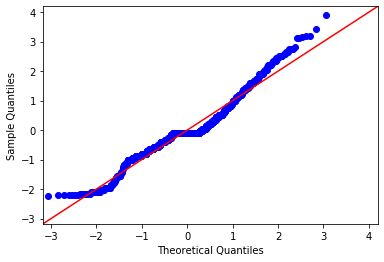

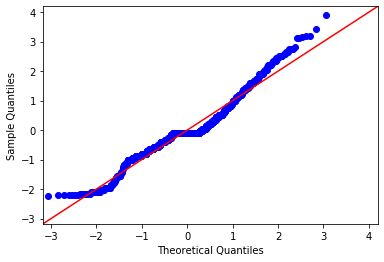

In [48]:
sm.qqplot(df['Age'], stats.norm, fit=True, line='45')

In [49]:
#### Histplot, QQplot and pp-plot
import matplotlib.pyplot as plt
import pylab 
def plot_data(df,feature):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stats.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()
    

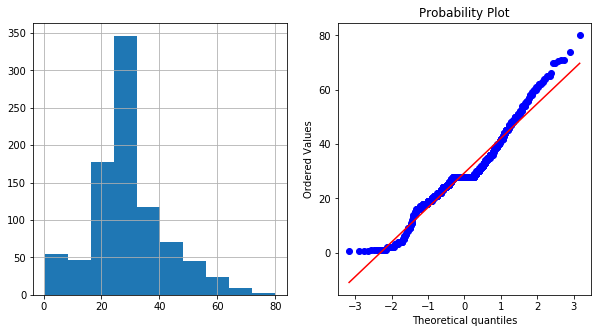

In [50]:
plot_data(df,'Age')

#### Logarithmic Transformation

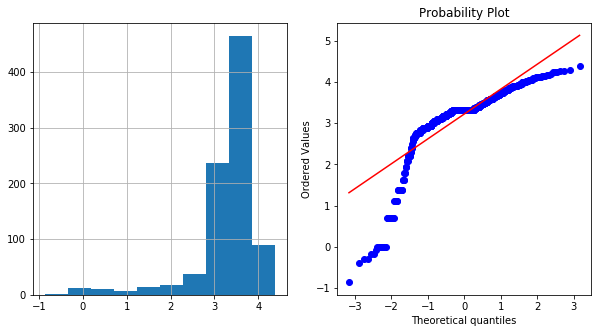

In [51]:
import numpy as np
df['Age_log']=np.log(df['Age'])
plot_data(df,'Age_log')

We can see that the a lot of points are not close to the line, which signifies this is not of log distribution.

#### Reciprocal Trnasformation

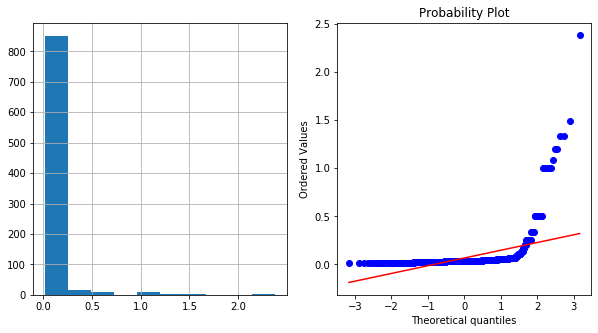

In [52]:
df['Age_reciprocal']=1/df.Age
plot_data(df,'Age_reciprocal')

#### Square Root Transformation

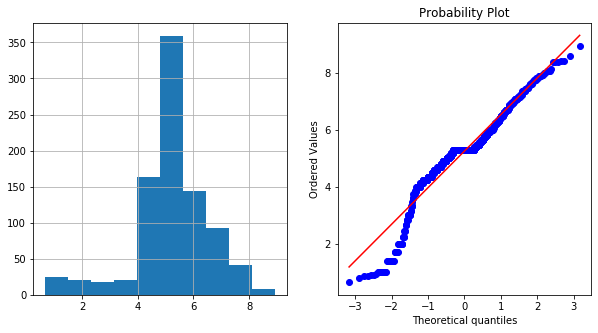

In [53]:
df['Age_sqaure']=df.Age**(1/2)
plot_data(df,'Age_sqaure')

#### Exponential Transdormation

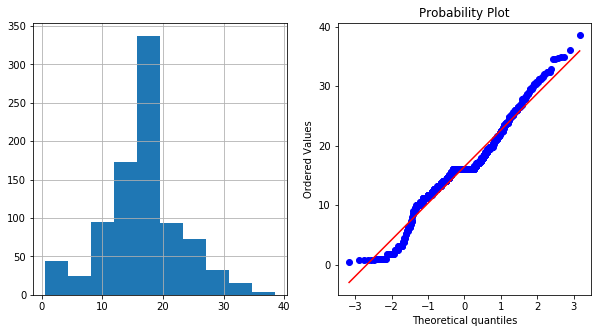

In [54]:
df['Age_exponential']=df.Age**(1/1.2)
plot_data(df,'Age_exponential')

We can observe that the points are very close to the line comparing to any other distribution. so we can say, this can be of exponential distribution.

#### BoxCOx Transformation
The Box-Cox transformation is defined as: 

T(Y)=(Y exp(Î»)âˆ’1)/Î»

where Y is the response variable and Î» is the transformation parameter. Î» varies from -5 to 5. In the transformation, all values of Î»  are considered and the optimal value for a given variable is selected.

In [55]:
df['Age_Boxcox'],parameters=stats.boxcox(df['Age'])

In [56]:
print(parameters)

0.7964531473656952


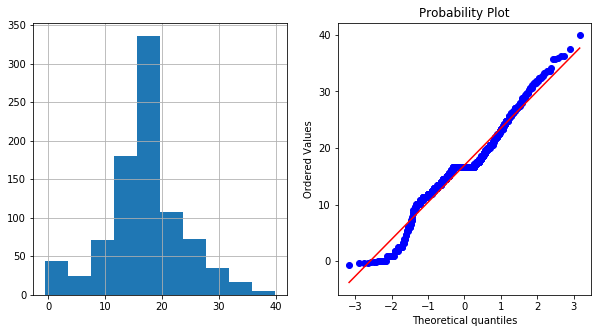

In [57]:
plot_data(df,'Age_Boxcox')

### 6. Using Composite Transformers to speed up FE

- Transformers are algorithms or tools that are used to preprocess, modify, or create new representations of data. The ones we have seen so far are called transformers, like the StandardScaler, OneHotEncoding etc.  Transformers can perform a variety of operations, including scaling, encoding, imputing missing values, and generating new features. 


- We know that generally training data contains diverse features such as numeric and categorical. And different feature types are processed with different transformers.


- And **to combine those individual transformers**, we use Composite Transformers.

### Column Transformer

- Imagine you have a table with different types of information like numbers, categories, and so on. A ColumnTransformer is like a smart worker who can handle each type of information in the table differently.


- For instance, let's say you have columns for people's ages, their jobs, and their education levels. You might want to do different things to each of these types of data. Maybe you want to scale the ages so they all have a similar impact. You might also want to turn the different jobs and education levels into numbers so the computer can understand them better.


- A ColumnTransformer is like a helpful friend who can take care of each of these tasks automatically. You tell the ColumnTransformer what to do with each column, and it does the job for you. So you don't have to worry about doing each task separately. 


- To implement this we can use `ColumnTransformer` API from sklearn.compose module

In [58]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Create a sample dataset
data = {'age': [30, 40, 35, 25, 32],
        'gender': ['Male', 'Female', 'Male', 'Female', 'Male'],
        'income': [50000, 75000, 100000, 40000, 60000]}

df = pd.DataFrame(data)

df

,age,gender,income
0,30,Male,50000
1,40,Female,75000
2,35,Male,100000
3,25,Female,40000
4,32,Male,60000


In [59]:
# Define the transformations for different columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['age','income']),
        ('cat', OneHotEncoder(), ['gender'])
    ])

# Apply the transformations to the dataset
transformed_df = preprocessor.fit_transform(df)
transformed_df

array([[-0.47961646, -0.71509694,  0.        ,  1.        ],
       [ 1.51878546,  0.47673129,  1.        ,  0.        ],
       [ 0.5195845 ,  1.66855953,  0.        ,  1.        ],
       [-1.47881742, -1.19182824,  1.        ,  0.        ],
       [-0.07993608, -0.23836565,  0.        ,  1.        ]])

- So if you observe here, age and income are scaled with standard scaler and gender is scaled with onehot encoder all with one single transformer that we created. 

- So, for the testing data, we don't have to apply each and every transformer seperately, we can just apply this one alone.

### 7. Using Pipelines to Automate FE

The `sklearn.pipeline` module provides utilities to build a composite estimator, as a chain of transformers and estimators.

- **Pipeline:** Constructs a chain of multiple transformers to execute a fixed sequence of steps in data preprocessing and modelling.


- **FeatureUnion:** Combines output from several transformer objects by creating a new transformer from them.


### Pipelines

- The purpose of the pipeline is to automate the process of sequentially applying a list of transformers and a final estimator, allowing for a more efficient and organized workflow in machine learning tasks.


- So usually it is used like intermediate steps as transformers, and the final step as estimator.


- Pipeline() method will take a list of (estimator_name,estimator()) tuples.

In [60]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the Iris dataset
data = load_iris()
X = data.data
y = data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Data Preprocessing
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Model Training
clf = SVC()
clf.fit(X_train_pca, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test_pca)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 0.9333333333333333


So, IF you observe above, we had to do few data processing steps as

- Create standard scaler and fit and transform it with training data, and apply it for test data.


- Create PCA to reduce Dimensions and fit and transform it with training data, and apply it for test data.


- Create Model and fit and predict with the model.

Now, all these steps can be combined and used seamlessly with pipelines as follows:

In [61]:
from sklearn.pipeline import Pipeline

# Define the pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),  # Data preprocessing - Feature scaling
    ('pca', PCA(n_components=2)),  # Data preprocessing - Dimensionality reduction
    ('classifier', SVC())  # Model training - Support Vector Classifier
])

# Fit the pipeline on the training data
pipe.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipe.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 0.9333333333333333


- Here, Just by giving Pipe.fit it applies all the things as scaling, dimensionality reduction and model fitting.


- Then during pipe.predict, it wil apply these to test data, very simple, right?


- Similarly, you can add many more transformer as you want.


### Access Individual steps in pipeline

- YOu can also access the individual steps easily in various ways, say if i want to access pca estimator from above pipeline.

1. pipe.named_steps.pca
2. pipe.steps[1]
3. pipe[1]
4. pipe['pca']

### Accessing parameters of each step in Pipeline

Parameters of the estimators in the pipeline can be accessed using the `estimator__parametername`. You can set all the parameter values at once using `.set_params()`

In [62]:
# Define the pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),  # Data preprocessing - Feature scaling
    ('pca', PCA()),  # Data preprocessing - Dimensionality reduction
    ('classifier', SVC())  # Model training - Support Vector Classifier
])

pipe.set_params(pca__n_components = 2)

# Fit the pipeline on the training data
pipe.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipe.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9333333333333333


### Performing Grid Search with Pipeline

By using naming convention of nested parameters, grid search can implemented

In [63]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# Load the Iris dataset
data = load_iris()
X = data.data
y = data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),  # Data preprocessing - Feature scaling
    ('pca', PCA()),  # Data preprocessing - Dimensionality reduction
    ('classifier', SVC())  # Model training - Support Vector Classifier
])

# Define the hyperparameter grid
param_grid = {
    'pca__n_components': [2, 3, 4],
    'classifier__C': [0.1, 1, 10, 100],
    'classifier__gamma': [0.1, 0.01, 0.001],
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(pipe, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Make predictions on the test data
y_pred = grid_search.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Best parameters: {grid_search.best_params_}')
print(f'Accuracy: {accuracy}')


Best parameters: {'classifier__C': 1, 'classifier__gamma': 0.1, 'pca__n_components': 3}
Accuracy: 1.0


So, the given parameters each combination will be checked, and the best accuracy one will be fit to the model.

you can get the best parameters by using `.best_params_` method for your created grid object.

### Combining Transformers and Pipelines

- sklearn.pipeline.FeatureUnion concatenates results of multiple transformer objects. 

- Applies a list of transformer objects in parallel, and their outputs are concatenated side-by-side into a larger matrix.

In [64]:
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the data (using a sample dataset for demonstration)
X = pd.read_csv('titanic.csv',usecols=['Fare','Age','Sex','Embarked'])
y = pd.read_csv('titanic.csv',usecols=['Survived'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Numeric Pipeline
numeric_pipeline = ColumnTransformer([
    ('imputer', SimpleImputer(strategy='mean'),['Age']),
    ('scaler', StandardScaler(),['Age','Fare'])
])

# Column Transformer for Categorical Features
categorical_transformer = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Feature Union
full_pipeline = FeatureUnion([
    ('numeric_pipeline', numeric_pipeline),
    ('categorical_transformer', categorical_transformer)
])

# Fit the pipeline on the training data
full_pipeline.fit(X_train, y_train)

FeatureUnion(transformer_list=[('numeric_pipeline',
                                ColumnTransformer(transformers=[('imputer',
                                                                 SimpleImputer(),
                                                                 ['Age']),
                                                                ('scaler',
                                                                 StandardScaler(),
                                                                 ['Age',
                                                                  'Fare'])])),
                               ('categorical_transformer',
                                Pipeline(steps=[('imputer',
                                                 SimpleImputer(strategy='most_frequent')),
                                                ('onehot',
                                                 OneHotEncoder(handle_unknown='ignore'))]))])

1. The numeric_pipeline has two steps:
   - SimpleImputer: This step imputes missing values in the numeric features using the mean value.
   - StandardScaler: This step scales the numeric features to have a mean of 0 and a standard deviation of 1.


2. The categorical_transformer has two steps:

   - SimpleImputer: This step imputes missing values in the categorical features using the most frequent value.
   - OneHotEncoder: This step one-hot encodes the categorical features, which means that it creates a new binary feature for each unique category in each categorical feature.
   
   
3. The FeatureUnion pipeline then combines the output of the numeric_pipeline and the categorical_transformer into a single feature matrix. This feature matrix can then be used to train a machine learning model.

### Visualizing the Pipeline

In [65]:
from sklearn import set_config
set_config(display='diagram')
full_pipeline

FeatureUnion(transformer_list=[('numeric_pipeline',
                                ColumnTransformer(transformers=[('imputer',
                                                                 SimpleImputer(),
                                                                 ['Age']),
                                                                ('scaler',
                                                                 StandardScaler(),
                                                                 ['Age',
                                                                  'Fare'])])),
                               ('categorical_transformer',
                                Pipeline(steps=[('imputer',
                                                 SimpleImputer(strategy='most_frequent')),
                                                ('onehot',
                                                 OneHotEncoder(handle_unknown='ignore'))]))])

This is my Entire Feature Engineering Learnings. Hope this Helps! Happy Learning :)